# Time Series Forecasting

`WORK IN PROGRESS`

## References

- [Wikipedia](https://en.wikipedia.org/wiki/Time_series)
- [Tableau TS doc](https://www.tableau.com/learn/articles/time-series-forecasting)
- [Tensorflow](https://www.tensorflow.org/tutorials/structured_data/time_series)

In [1]:
from datetime import datetime


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from scipy.stats import spearmanr, pearsonr
from mightypy.ml.utils import moving_window_matrix

plt.style.use('fivethirtyeight')


## Introduction to Time Series

- Time series forecasting occurs when you make scientific predictions based on historical time stamped data. It involves building models through historical analysis and using them to make observations and drive future strategic decision-making.
- Time series is any sequence record over time eg.- hourly, daily, weekly etc. 

Some applications of Time Series - 

- Interpretation : make sense of the data and capture changes/ dynamics.
- Modeling and Forecasting : Understanding aspects of data and create models for predictions/ future forecast.
- Filtering/ Smoothing : Process the data.

\begin{align}
    X_t &= T_t + S_t + C_t + I_t\\
\end{align}

Where

- $X_t$ = Trend : General direction of data. long-term progression of series.    
- $S_t$ = Seasonal : component fixed and known period, distinct repeated patterns for regular intervals like yearly, quarterly, monthly, weekly etc. like sell count of xmas trees at the time of xmas.
- $C_t$ = Cyclical : Optional component that is repeatative but doesn't happen at fixed intervals.
- $I_t$ = Residuals : fluctuations in time series after removing trend, seasonal and cyclic variations.

`Each observation in the series can be expressed as either a sum or a product of the components.`

## Load Data

In [2]:
df = pd.read_csv('/opt/datasetsRepo/stock.csv')
df['Date'] = df['Date'].apply(pd.to_datetime)
df['Close'] = df['Close'].apply(lambda x: float(x.replace(',','')))
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(',','')))
df.index = df['Date']

df.head(3)

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2012-01-03,2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,2012-01-05,329.83,330.75,326.89,657.21,6590300.0


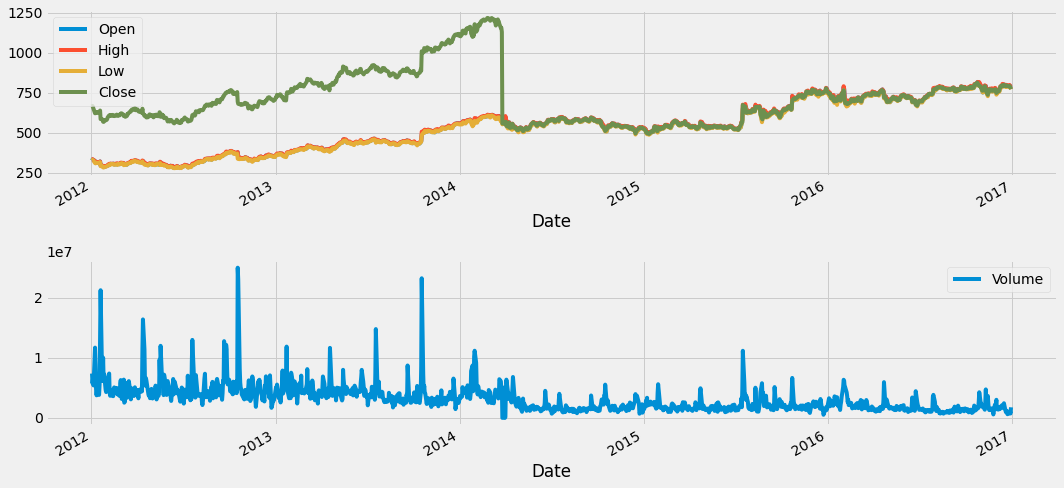

In [3]:
fig, ax = plt.subplots(2,1,figsize=(15,7))
df.plot(y=['Open','High','Low','Close'], ax=ax[0])
df.plot(y=['Volume'], ax=ax[1])

plt.tight_layout()
plt.show()

In [4]:
df['Month-Year'] = df['Date'].apply(lambda x : datetime.strftime(x, '%m-%Y'))
df.head(3)

,Date,Open,High,Low,Close,Volume,Month-Year
Date,,,,,,,
2012-01-03,2012-01-03,325.25,332.83,324.97,663.59,7380500.0,01-2012
2012-01-04,2012-01-04,331.27,333.87,329.08,666.45,5749400.0,01-2012
2012-01-05,2012-01-05,329.83,330.75,326.89,657.21,6590300.0,01-2012


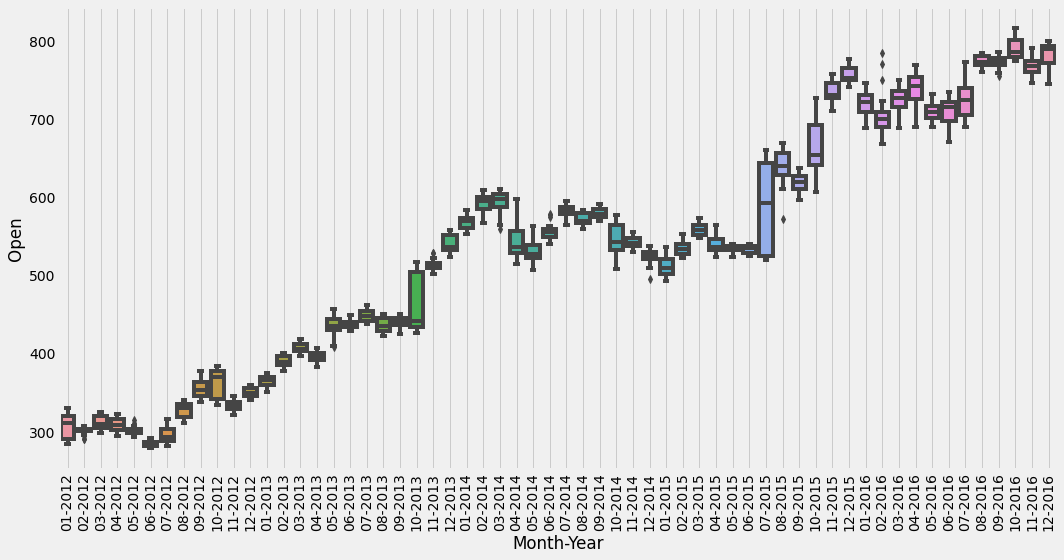

In [5]:
fig, ax = plt.subplots(1,1,figsize=(15,8))

sns.boxplot(data=df, x='Month-Year',y='Open', ax=ax)

plt.xticks(rotation=90)
plt.grid()
plt.tight_layout()
plt.show()

## Kolmogorov extension theorem

## AutoCorrelation & Partial AutoCorrelation

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [14]:
data = df['Open']

In [20]:
LAGS = 24

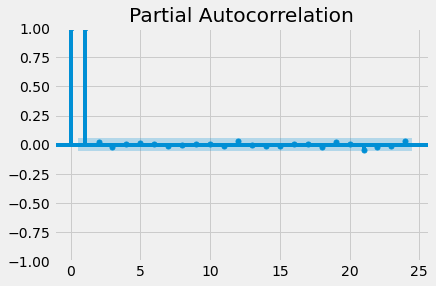

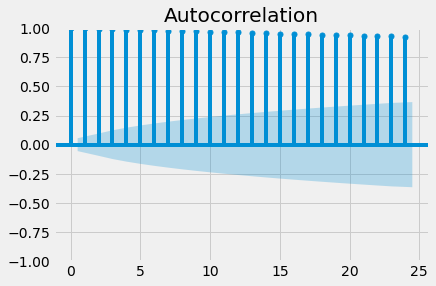

In [28]:
plot_pacf(data, lags=LAGS, method='ywm'); plot_acf(data, lags=LAGS); print()

## Exponential Smoothing

## Prophet

## Auto Regression Model

## Moing Average Model

## ARIMA